In [2]:
#Import module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read in data
df_player = pd.read_csv('player_cleaned.csv')
df_team = pd.read_csv('team_cleaned.csv')
df_kill = pd.read_csv('kill_cleaned.csv')

Examine data frames

In [5]:
print(df_player.shape)
df_player.head()

(66, 15)


,rank,player,match,damages,knock,kill,survive,assist,longest,traveled,accuracy,main_weapon,kill_per_match,damages_per_match,team_placement
0,1,DxG_Sapauu,20,6109.44,27,37,1397,19,351,143.50,0.1176,FNFal,1.85,305.4720,1
1,2,AAP_CeeJay18,20,4270.08,20,32,1330,14,505,118.84,0.1024,Mini14,1.60,213.5040,4
2,3,BRU_Eaddy,20,3548.97,19,30,1348,10,413,120.05,0.1573,FNFal,1.50,177.4485,3
3,4,QC_Gems,20,4935.77,26,29,1265,18,422,92.29,0.1158,FNFal,1.45,246.7885,2
4,5,DIC_AnhQuan,20,4549.64,17,29,1245,13,318,84.91,0.1665,HK416,1.45,227.4820,7


In [9]:
print(df_team.shape)
df_team.head()

(16, 43)


,team_rank,team,total_point,r1_point,r1_kill,r2_point,r2_kill,r3_point,r3_kill,r4_point,...,r16_point,r16_kill,r17_point,r17_kill,r18_point,r18_kill,r19_point,r19_kill,r20_point,r20_kill
0,1,DXG,165,2,5,6,11,4,6,16,...,7,8,2,4,1,10,4,8,4,5
1,2,QC4,137,3,13,9,3,3,5,15,...,5,6,4,8,10,4,12,0,11,2
2,3,BRU,137,13,1,1,6,13,1,11,...,8,4,8,2,6,5,10,5,8,1
3,4,AAP,135,5,5,11,0,12,1,8,...,11,3,14,3,7,1,3,4,10,3
4,5,MiTH,133,7,1,2,14,1,10,10,...,4,7,13,1,9,6,13,1,16,2


In [10]:
print(df_kill.shape)
df_kill.head()

(16, 11)


,team,phase1,phase2,phase3,phase4,phase5,phase6,phase7,phase8,phase9,total_kill
0,DXG,0.0316,0.0316,0.4316,0.5474,0.4211,0.7368,0.3368,0.2316,0.3263,95
1,QC4,0.2917,0.1771,0.1146,0.4792,0.8229,0.0417,0.2708,0.3021,0.0000,96
2,BRU,0.1059,0.0471,0.4235,0.4118,0.5529,0.4000,0.2235,0.1765,0.2824,85
3,AAP,0.4235,0.3412,0.1059,0.6235,0.8588,0.1529,0.2588,0.2471,0.2471,85
4,MiTH,0.2135,0.1573,0.0899,0.3034,0.7303,0.5618,0.3146,0.1910,0.6966,89


Examine data

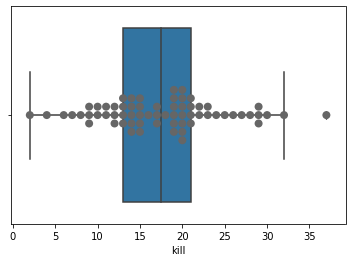

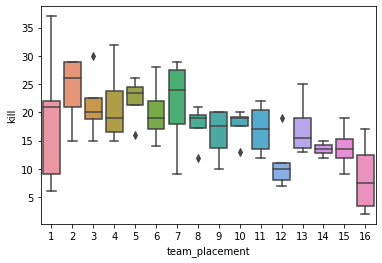

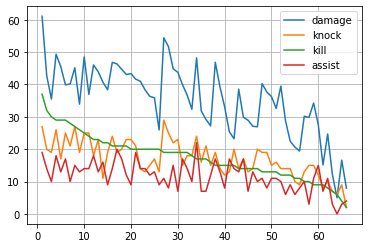

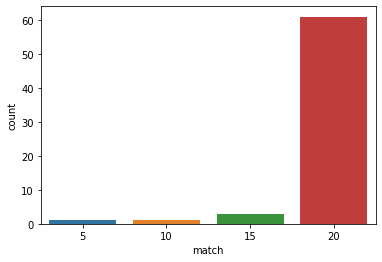

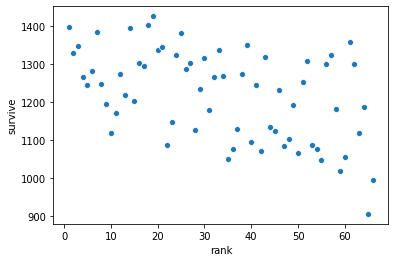

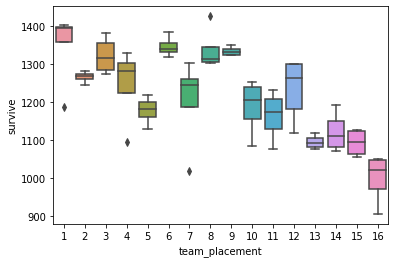

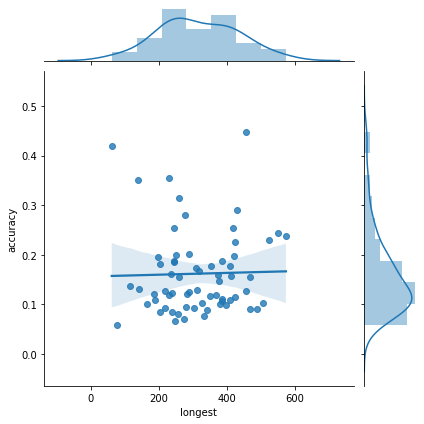

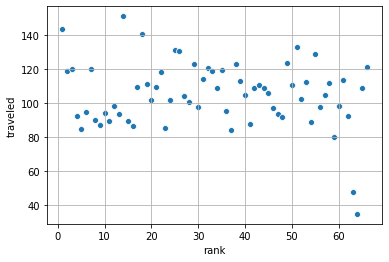

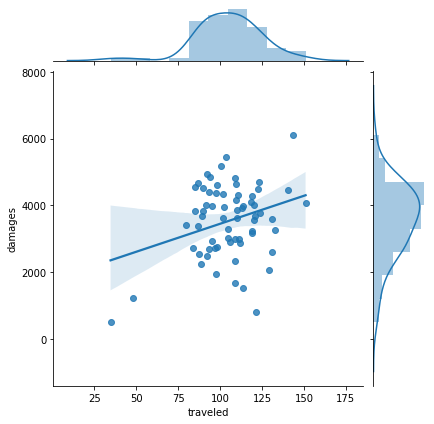

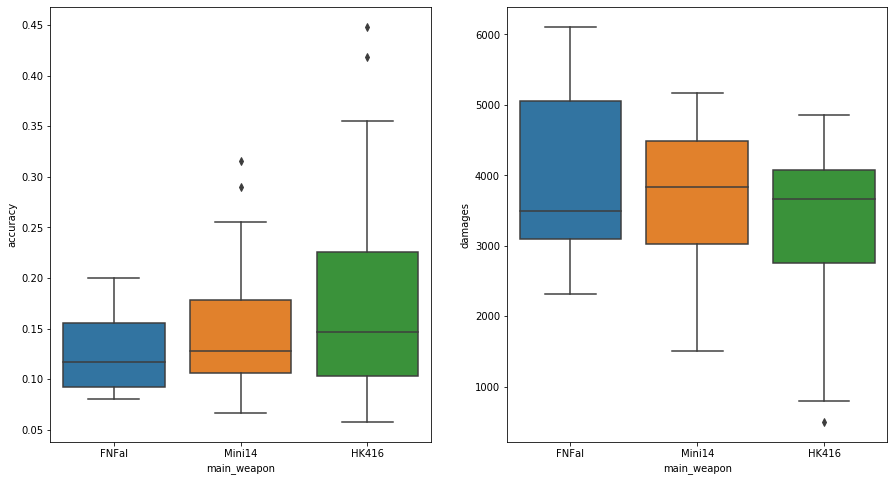

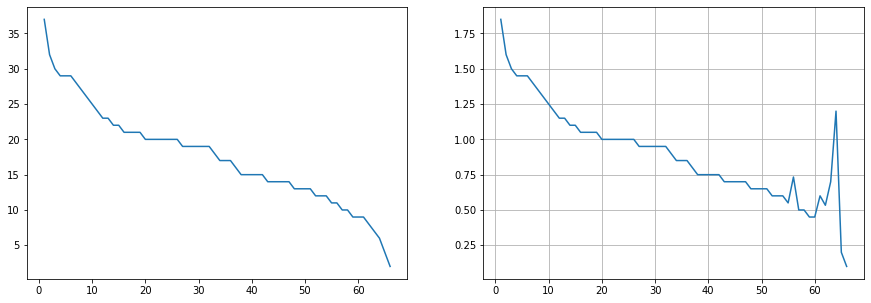

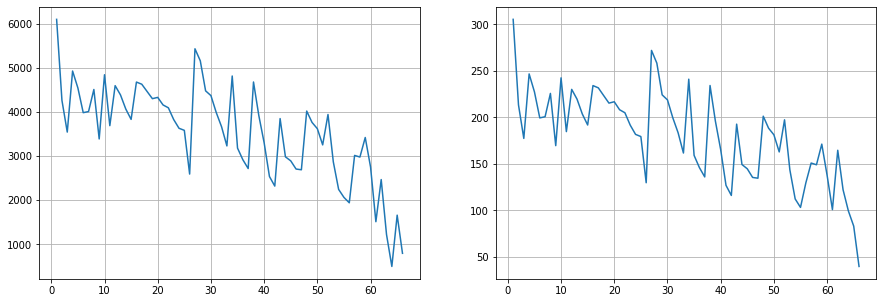

In [44]:
#Kil count boxplot
sns.boxplot(df_player.kill)
sns.swarmplot(df_player.kill, size=8, color=".4", linewidth=0)
plt.show()

#Kill vs. team_placement box plot
sns.boxplot(df_player.team_placement, df_player.kill)
plt.show()

#Damagae/knock/kill/assist
plt.plot(df_player['rank'], (df_player.damages / 100), label = 'damage')
plt.plot(df_player['rank'], df_player.knock, label = 'knock')
plt.plot(df_player['rank'], df_player.kill, label = 'kill')
plt.plot(df_player['rank'], df_player.assist, label = 'assist')
plt.legend()
plt.grid()
plt.show()

#Match count plot
sns.countplot(df_player.match)
plt.show()

#Survive
sns.scatterplot(df_player['rank'], df_player.survive)
plt.show()

#Survive vs. team_placement boxplot
sns.boxplot(df_player.team_placement, df_player.survive)
plt.show()

#Longest vs. accuracy
sns.jointplot(df_player.longest, df_player.accuracy, kind="reg")
plt.show()

#Travel distance
sns.scatterplot(df_player['rank'],df_player.traveled)
plt.grid()
plt.show()

#Travel vs. damages
sns.jointplot(df_player.traveled, df_player.damages, kind="reg")
plt.show()

#Main_weapon vs. accuracy/damages
plt.figure(figsize=(15, 8))
plt.subplot(121)
sns.boxplot(df_player.main_weapon, df_player.accuracy)

plt.subplot(122)
sns.boxplot(df_player.main_weapon, df_player.damages)
plt.show()

#Kill vs. kill_per_match
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(df_player['rank'], df_player.kill)

plt.subplot(122)
plt.plot(df_player['rank'], df_player.kill_per_match)
plt.grid()
plt.show()

#Damages vs. damage_per_match
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(df_player['rank'], df_player.damages)
plt.grid()

plt.subplot(122)
plt.plot(df_player['rank'], df_player.damages_per_match)
plt.grid()
plt.show()

Substitute players

In [21]:
df_player.match.value_counts()

0    61
1     5
Name: sub_player, dtype: int64

In [20]:
sub_player = []
for x in range(len(df_player.match)):
    if df_player.match[x] == 20:
        sub = 0
    else:
        sub = 1
    sub_player.append(sub)
    
df_player['sub_player'] = sub_player

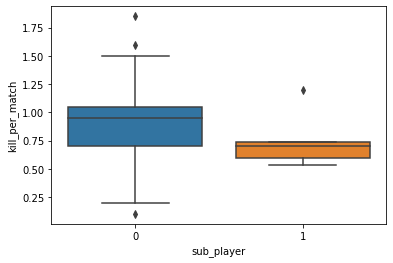

In [22]:
#Compare subtitute players with starting players
sns.boxplot(df_player.sub_player, df_player.kill_per_match)
plt.show()

Pearson correlation between variables

Text(0.5, 1, 'Figure n: variables correlations heatmap')

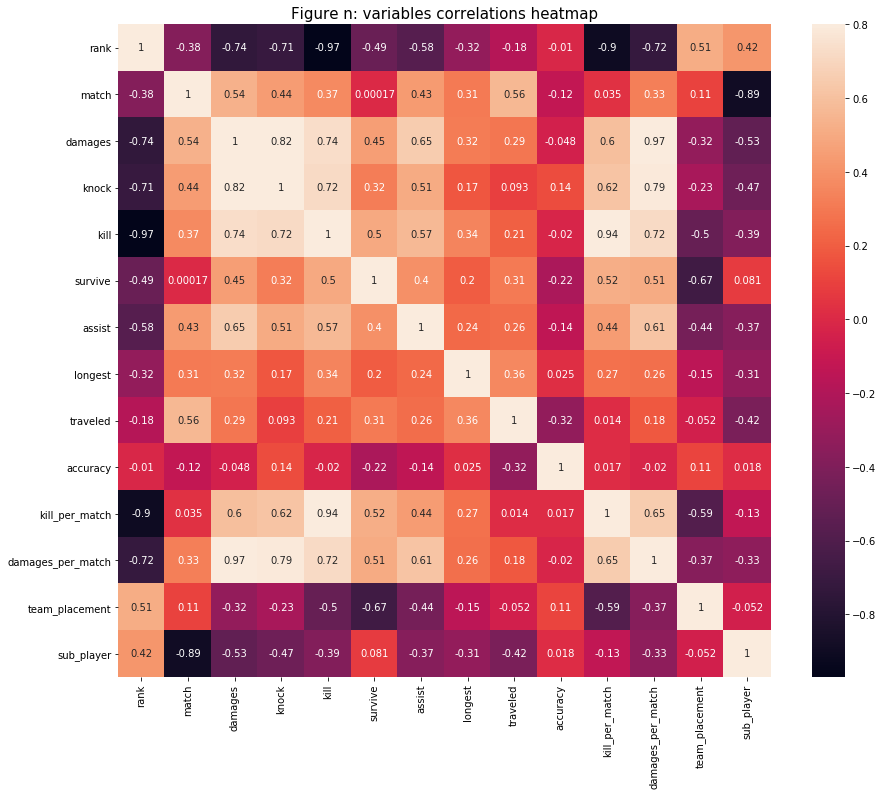

In [43]:
#Heat map
corr = df_player.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax = .8, square = True, annot = True)
plt.title('Figure n: variables correlations heatmap', fontsize=15)

In [ ]:
#